######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3b235">Linear Regression
<font color=darkblue>
    
    
- `Factors influencing Life Expectancy using Linear Regression`
    
- 1. <a href = #link1>Overview of the data</a>
- 2. <a href = #link2>Data Visualization</a>
- 3. <a href = #link3>Data Preparation</a>
- 4. <a href = #link4>Choose Model, Train and Evaluate</a>
- 5. <a href = #link5>Conclusion</a>
- 6. <a href = #link6>Add-on: Statsmodels</a>

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#d40eea">Import Libraries
<font color=darkblue>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#b0c335">Load and explore the dataset
<font color=darkblue>

In [4]:
cdata  = pd.read_csv('/home/jayanthikishore/Downloads/ML_classwork/Week3strt/Life Expectancy Data.csv') 
cdata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
cdata.shape

(2938, 22)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#35c3bc">The data-set aims to answer the following key questions:
<font color=darkblue>

- Do various predicting factors really affect the Life expectancy?
- What are the predicting variables actually affecting life expectancy?
- Should a country having a lower life expectancy value increase its healthcare expenditure in order to improve its average lifespan?
- Do infant and adult mortality rates affect life expectancy?
- Does life expectancy have positive or negative correlation with a country's status (developing or developed), lifestyle, GDP,  etc.
- What is the impact of schooling on the lifespan of humans?
- Does life expectancy have a positive or negative relationship with drinking alcohol?
- What is the impact of immunization coverage (for various diseases like Measles,Hepatitis B) on life expectancy?

In [7]:
cdata.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# remove the rows of data which have missing value(s)
cdata = cdata.dropna()

In [9]:
# Check the unique values in each column of the dataframe.
cdata.nunique()

Country                             133
Year                                 16
Status                                2
Life expectancy                     320
Adult Mortality                     369
Infant deaths                       165
Alcohol                             833
Percentage expenditure             1645
Hepatitis B                          83
Measles                             603
BMI                                 538
Under-five deaths                   199
Polio                                68
Total expenditure                   669
Diphtheria                           66
HIV/AIDS                            167
GDP                                1649
Population                         1647
Thinness  1-19 years                179
Thinness 5-9 years                  185
Income composition of resources     548
Schooling                           147
dtype: int64

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#355dc3">Insights
<font color=darkblue>

- The "Status" column has 2 unique values. i.e. The values are "Developing" and "Developed"
- The "Country" column has 133 unique values. i.e. The data is collected from 133 countries.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#a035c3">Data Visualizations
<font color=darkblue>

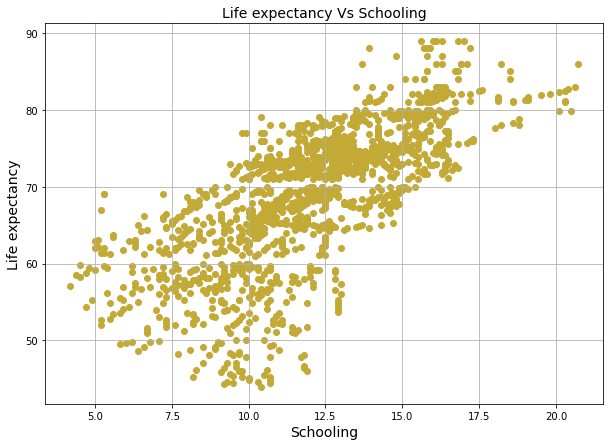

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['Schooling'], cdata['Life expectancy'], color='#c3a935')
plt.title('Life expectancy Vs Schooling', fontsize=14)
plt.xlabel('Schooling', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

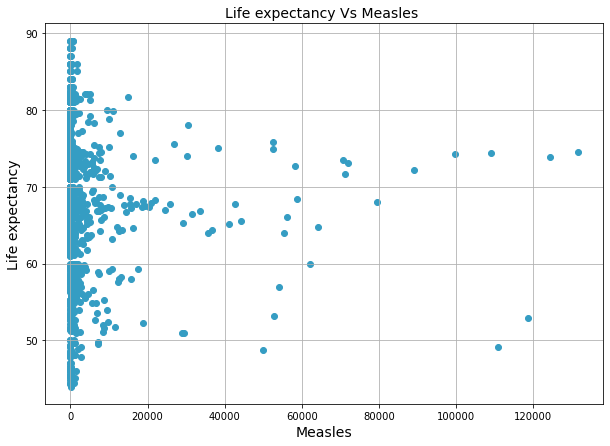

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['Measles'], cdata['Life expectancy'], color='#359dc3')
plt.title('Life expectancy Vs Measles ', fontsize=14)
plt.xlabel('Measles', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

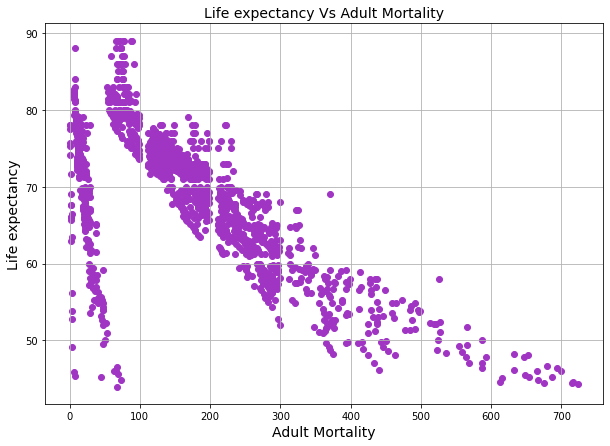

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['Adult Mortality'], cdata['Life expectancy'], color='#a035c3')
plt.title('Life expectancy Vs Adult Mortality', fontsize=14)
plt.xlabel('Adult Mortality', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

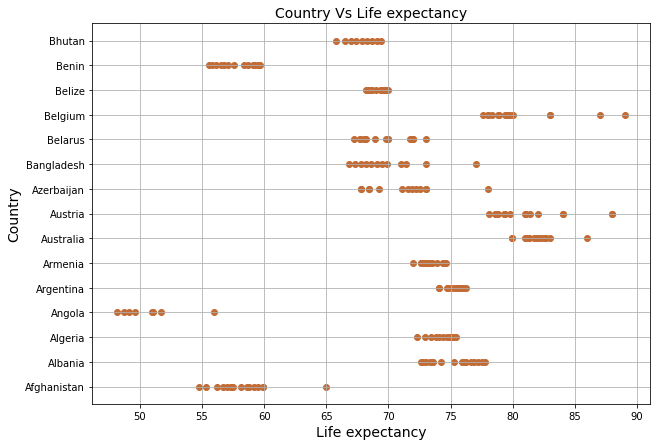

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['Life expectancy'][:200], cdata['Country'][:200], color='#c36b35')
plt.title('Country Vs Life expectancy', fontsize=14)
plt.xlabel('Life expectancy', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True)
plt.show()

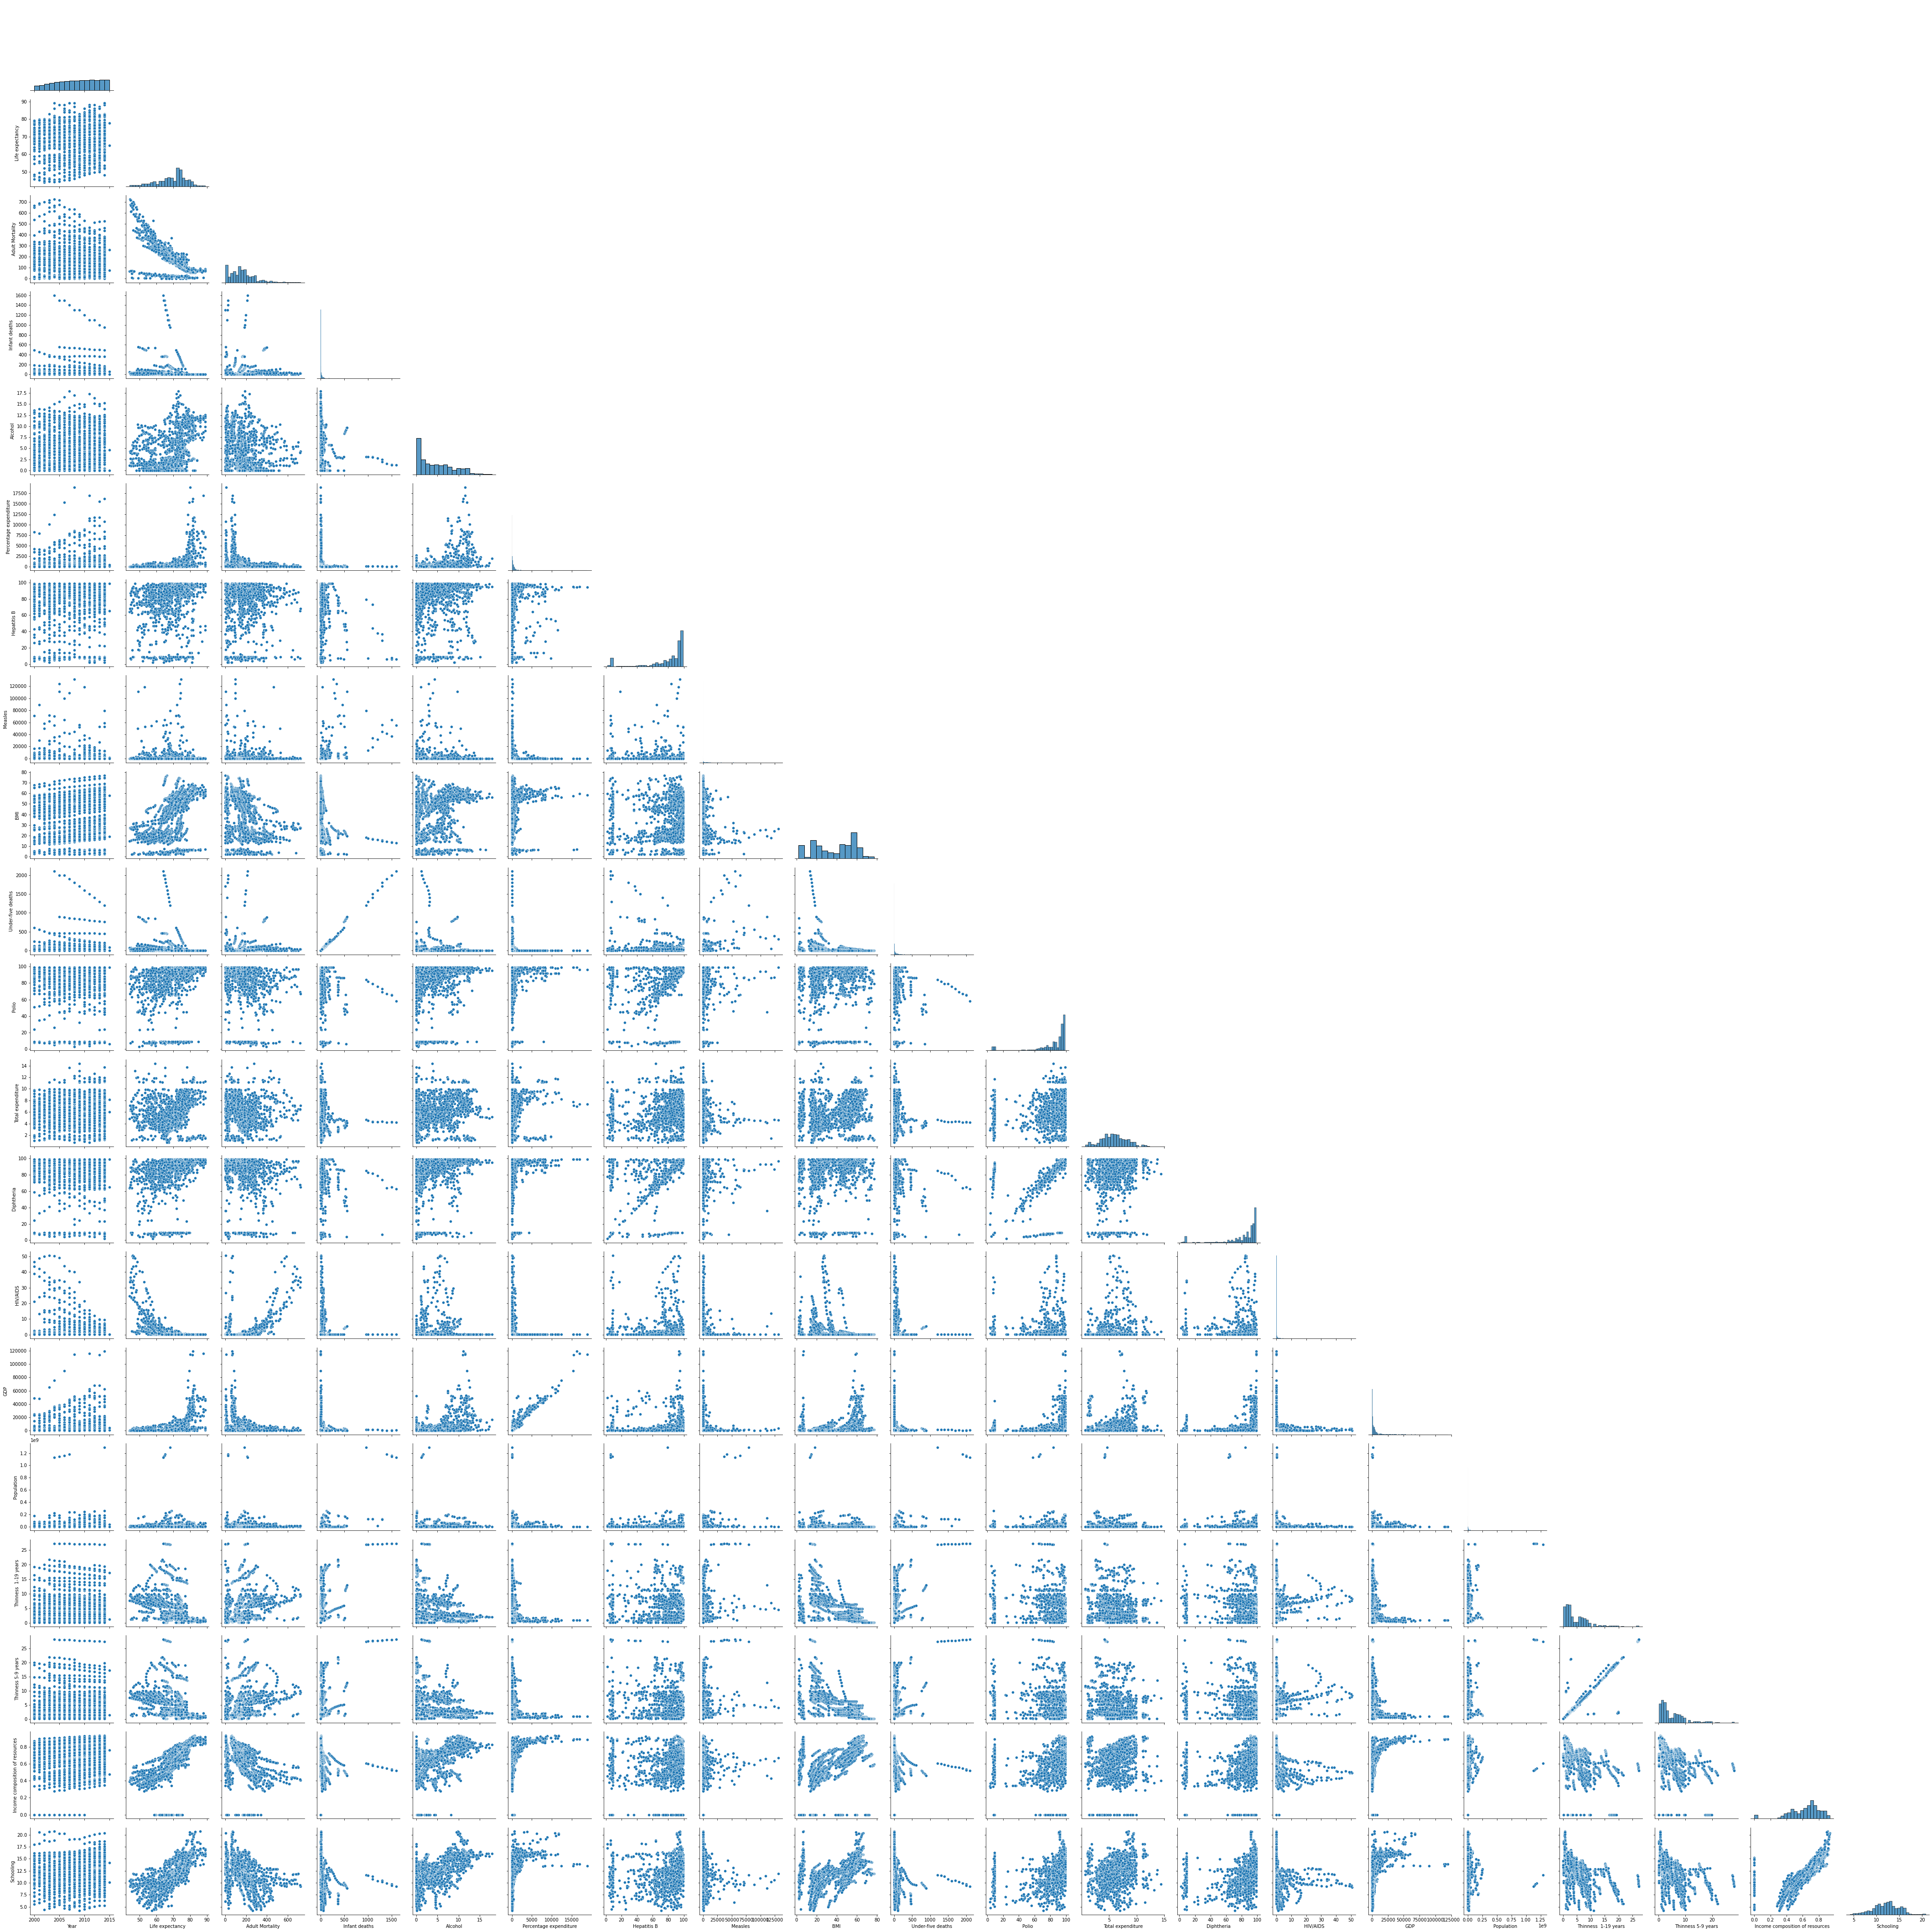

In [21]:
sns.pairplot(cdata, height=3, diag_kind='auto', corner=True)
plt.show()

- We can see from the 2nd and 3rd column of the graph that these features have linear (or inversely linear) relationship.

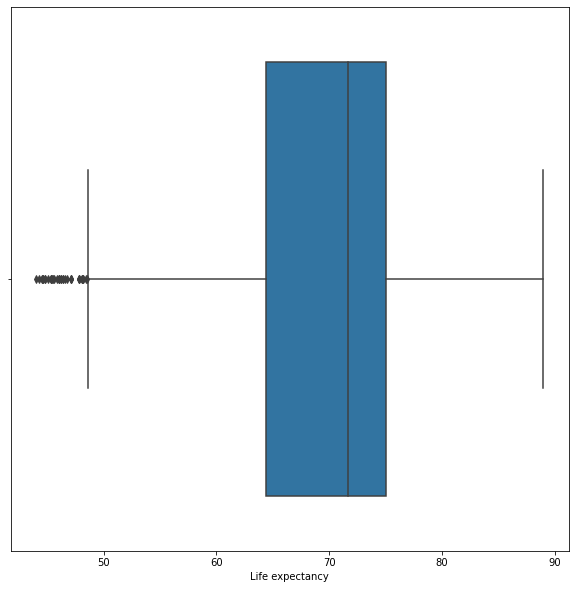

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(cdata['Life expectancy'], orient='v')
plt.show()

- The bottom black horizontal line of blue box plot is called 'minimum' and is calculated as Q1-1.5*IQR, which is around 48 years.
- First black horizontal line of rectangle shape of blue box plot is First quartile or 25 percentile. The age corresponding to this line is 64 years.
- Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median. The age corresponding to this is 72 years.
- Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%. The age corresponding to this is 75 years.
- Top black horizontal line of rectangle shape of blue box plot is called 'maximum' and is calculated as Q3+1.5*IQR. The value corresponding to this is 88 years.
- Small diamond shape of blue box plot is outlier data or erroneous data. Which is below the bottom black horizontal line.

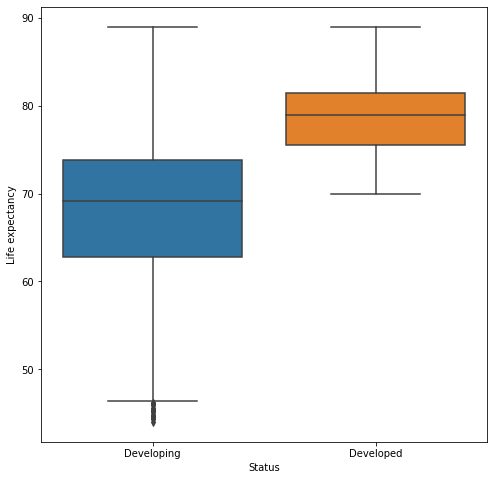

In [23]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Status",y="Life expectancy",data=cdata)
plt.show()

- The life expectancy in the developed countries is much higher than the developing countries.
- The median value of life expectancy (approximately as can be seen from the boxplot) for:
     - Developing: 69 years
     - Developed: 78 years

In [24]:
cdata[cdata.columns[:]].corr()['Life expectancy'][:]

Year                               0.050771
Life expectancy                    1.000000
Adult Mortality                   -0.702523
Infant deaths                     -0.169074
Alcohol                            0.402718
Percentage expenditure             0.409631
Hepatitis B                        0.199935
Measles                           -0.068881
BMI                                0.542042
Under-five deaths                 -0.192265
Polio                              0.327294
Total expenditure                  0.174718
Diphtheria                         0.341331
HIV/AIDS                          -0.592236
GDP                                0.441322
Population                        -0.022305
Thinness  1-19 years              -0.457838
Thinness 5-9 years                -0.457508
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy, dtype: float64

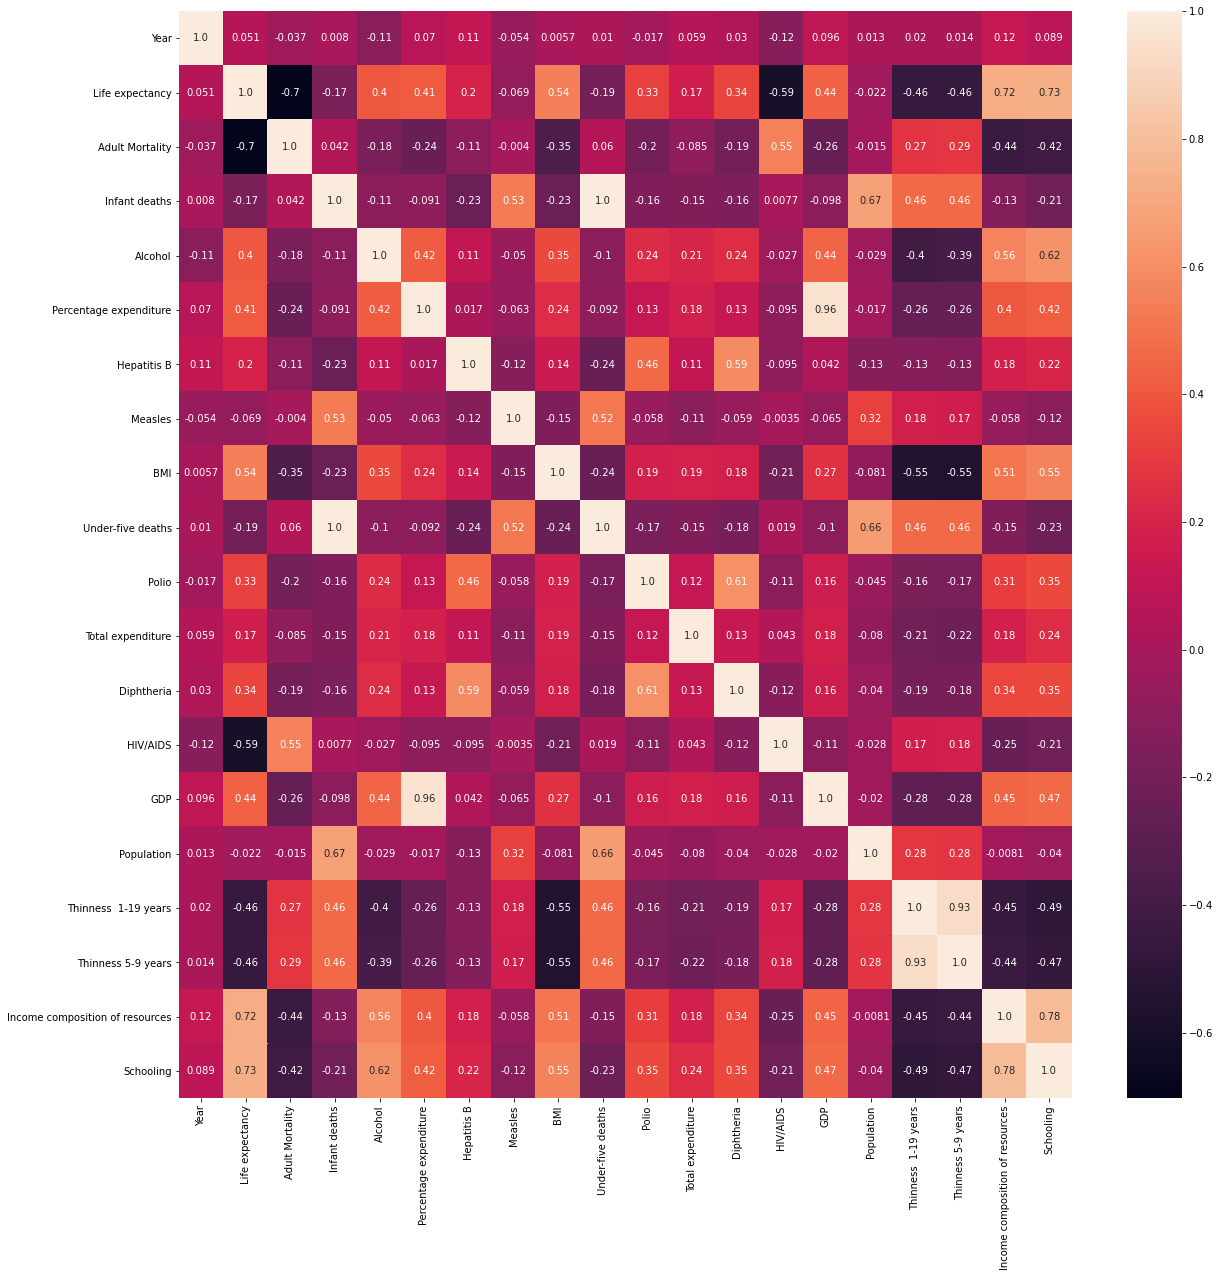

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(cdata.corr(), annot=True, fmt=".2")
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#a035c3">Data Preparation
<font color=darkblue>

In [26]:
X = cdata.drop('Life expectancy', axis=1)
y = cdata[['Life expectancy']]

print(X.head())
print(y.head())

       Country  Year      Status  Adult Mortality  Infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.2592

In [27]:
print(X.shape,y.shape )

(1649, 21) (1649, 1)


In [28]:
X = pd.get_dummies(X, columns=['Country', 'Status'])
X.head()

,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#c34335">Split the dataset
<font color=darkblue>

In [29]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#c34335">Choose Model, Train and Evaluate
<font color=darkblue>

In [30]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)

Intercept of the linear equation: [-370.39923249]

COefficients of the equation are: [[ 2.18341200e-01 -4.25965091e-04  7.28152544e-02 -1.15746797e-01
  -3.63099062e-05  1.99567177e-03 -4.41704129e-06 -5.08329484e-03
  -5.66462864e-02 -8.57849110e-04 -1.73216730e-02  2.20806233e-03
  -2.78374203e-01 -4.82283672e-07  1.96856187e-09  1.03678455e-02
   5.67478068e-02  5.30963077e-01  4.05983164e-01 -8.78321506e+00
   7.46457656e+00  4.92555587e+00 -1.42658382e+01  6.01520191e+00
   5.88048191e+00  1.94391020e+00  3.65381015e+00  2.32870321e+00
   1.41649354e+00  2.22867048e+00  1.59959045e+00  1.57736884e+00
  -8.60376699e+00 -2.24478634e+00  7.87205969e+00 -8.02143731e+00
   4.38559558e+00 -4.76806311e+00 -7.54778984e+00 -9.85626475e+00
   4.38903311e+00 -2.03678264e+00 -1.00404780e+01  1.34596802e+01
  -1.29481469e+01 -1.23459633e+01  1.06404340e+01  5.31590679e+00
   5.66500448e+00 -5.58832507e+00  1.08326967e+01 -1.71393790e+00
   1.51385537e+00 -3.68586682e+00  4.92769106e+00  6.6436

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#b0c335">Mean Absolute Error (MAE)
<font color=darkblue>

In [32]:
# Mean Absolute Error
mean_absolute_error(y_test, pred)

1.224371976020462

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#35c3b7">Root Mean Square Error (RMSE)
<font color=darkblue>

In [37]:
mean_squared_error(y_test, pred)**0.5

2.07571589731342

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#35c3b7">R Squared
<font color=darkblue>

In [38]:
# R2 Squared:
r2_score(y_test, pred)

0.9454598210791567

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#3588c3">Training Score
<font color=darkblue>

In [41]:
# Training Score
linearregression.score(X_train, y_train)

0.9723226823336295

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#3588c3">Testing Score
<font color=darkblue>

In [43]:
#Testing score
linearregression.score(X_test, y_test)

0.9454598210791567

#### Now, let's compare the actual output values for X_test with the predicted values by executing the following script:

In [46]:
predict = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': pred.flatten()})
predict

,Actual,Predicted
0,67.5,67.680534
1,73.8,73.785661
2,79.1,80.160082
3,54.9,53.138555
4,48.6,51.046567
...,...,...
490,64.8,65.959530
491,71.4,72.459268
492,77.2,77.069198
493,78.6,77.934373


- We can also visualize comparison result as a bar graph using the below script :

- Note: As the number of records is huge, for representation purposes we'll consider just 25 records.

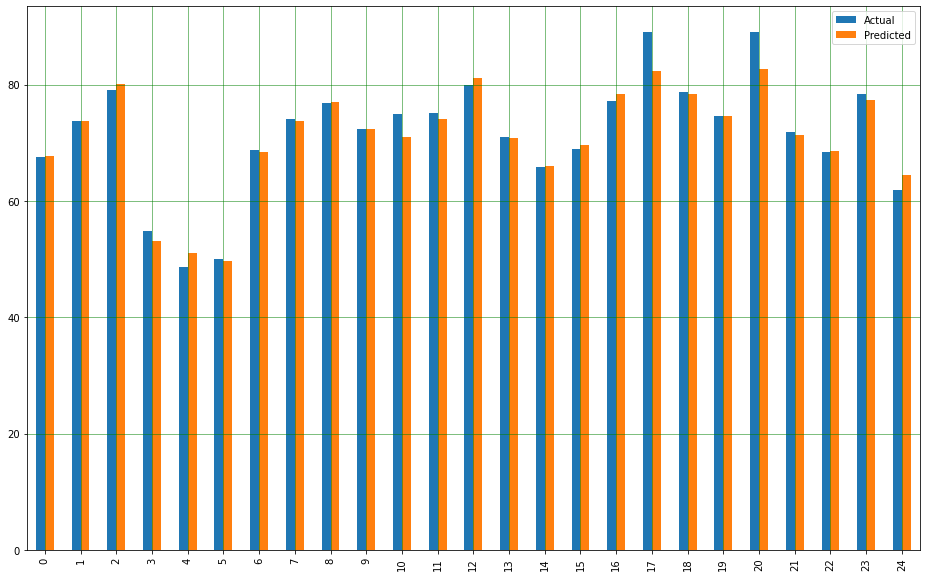

In [47]:
df1 = predict.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

- We can observe here that our model has returned pretty good prediction results.
- The Actual and Predicted values are comparable.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#ab35c3">Conclusion
<font color=darkblue>

- The Training and testing scores are around 95% and both scores are comparable, hence the model is a good fit.

- R2_score is 0.945, that explains 94.5% % of total variation in the dataset. So, overall the model performance is very satisfactory.
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#c335a2">Add-on: statsmodels
<font color=darkblue>

In [49]:
import statsmodels.api as sm

X = sm.add_constant(X)

linearmodel = sm.OLS(y, X).fit()

predictions = linearmodel.predict(X) 

print_model = linearmodel.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     294.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:07:59   Log-Likelihood:                -3100.3
No. Observations:                1649   AIC:                             6505.
Df Residuals:                    1497   BIC:                             7327.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

###### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.964**, which is good!
    - Note the difference in R^2 values from the sklearn model and OLS model. This is because we trained the sklearn model on training data and calculated the score using testing data but in statsmodels, we trained the model using the whole dataset and calculated the score on the same data.
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and, etc.) coefficients are zero, then the expected output for the dependent variable would be equal to the const coefficient.
    - In our case, the value for const coeff is **-248.7325**
3. **Status coeff**: It represents the change in the output Y due to a change in the status (everything else held constant).
4. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
5. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
6. **P >|t|**: It is p-value.
   - A p-value of less than 0.05 is considered to be statistically significant.
7. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

You can read about other terms in the **summary** [here](https://medium.com/@jyotiyadav99111/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01).

######  <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#ab35c3">Residual = Actual - Predicted
<font color=darkblue>

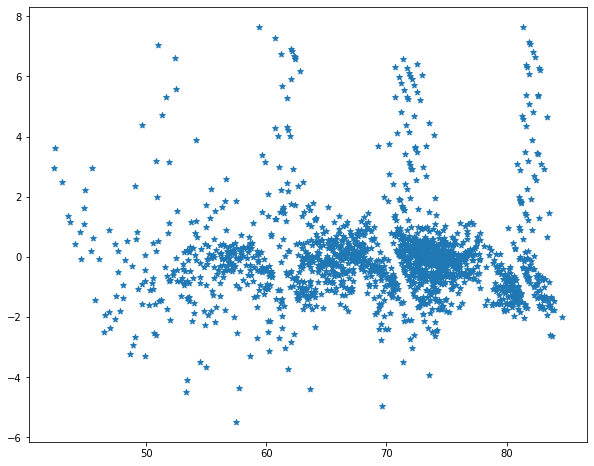

In [50]:
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(10,8))
plt.scatter(linearmodel.predict(), linearmodel.resid, marker='*')
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#3ec335">Error Distribution
<font color=darkblue>

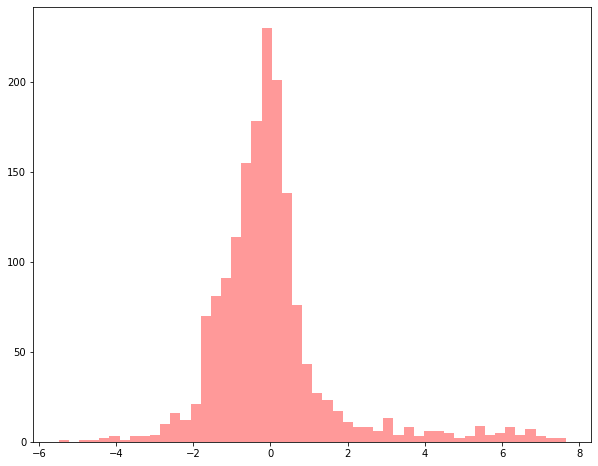

In [51]:
# error distribution
plt.figure(figsize=(10,8))
sns.distplot(linearmodel.resid, hist=True, kde=False, color='red')
plt.show()